# Data Preprocessing

## Configuration and imports

In [58]:
# basic configuration, put these lines at the top of each notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

In [60]:
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = None
pd.set_option("display.precision", 2)
pd.options.display.max_rows = 100

## Load credit card transaction data

In [61]:
DATA_PATH = "../data/raw/"

In [62]:
identity = pd.read_csv(f'{DATA_PATH}train_identity.csv')
transaction = pd.read_csv(f'{DATA_PATH}train_transaction.csv')

In [63]:
print(identity.shape)
identity.head()

(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [64]:
print(transaction.shape)
transaction.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [65]:
raw = pd.merge(transaction, identity, on='TransactionID', how='left')
raw.shape

(590540, 434)

In [66]:
raw = raw.drop(columns=['TransactionID'])

## First glance at dataset

Detailed information about the dataset can be found in this [forum post](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#latest-607486) of the corresponding Kaggle competition.

In [67]:
cat_feats = ['isFraud', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 
             'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
             'DeviceType', 'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19',
             'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
             'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']

In [68]:
for feat in cat_feats:
    raw[feat] = raw[feat].astype('category')

In [69]:
dtypes = [raw[feat].dtype.name for feat in raw.columns]
c = Counter(dtypes)
type_counts = c.most_common()

for count in type_counts:
    print(f'Dataset contains {count[1]} features of type {count[0]}.')

Dataset contains 382 features of type float64.
Dataset contains 50 features of type category.
Dataset contains 1 features of type int64.


0    0.97
1    0.03
Name: isFraud, dtype: float64


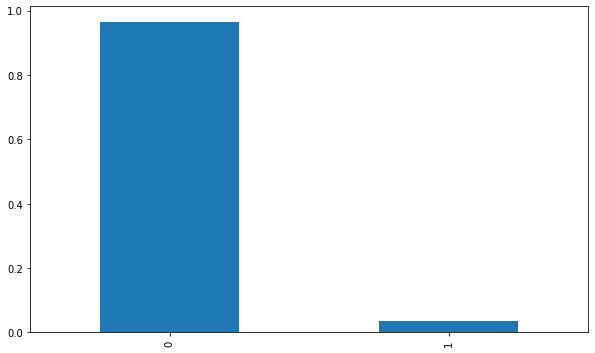

In [70]:
print(raw.isFraud.value_counts(normalize=True))
raw.isFraud.value_counts(normalize=True).plot(kind='bar')

In [71]:
def missing_val_perc(df, levels, axis=0, target=None):
    data = df
    if target is not None:
        data = data.loc[data.isFraud == target]
    missing_vals = data.isnull().sum(axis=axis).sort_values(ascending=False) / data.shape[axis]
    for l in levels:
        perc = len(missing_vals.loc[missing_vals > l]) / len(missing_vals)
        print('Percentage with more than {:.0f}% missing values: {:.1f}%'.format(l * 100, perc * 100))

In [72]:
levels = [0.1, 0.2, 0.5]
missing_val_perc(raw, levels)

Percentage with more than 10% missing values: 74.4%
Percentage with more than 20% missing values: 58.2%
Percentage with more than 50% missing values: 49.4%


## Dealing with missing values

### Attribute sampling

We will create two datasets: one smaller one (remove all features and examples with more than 10% missing values) and a bigger one (remove all features and examples with more than 20% missing values).

In [73]:
def remove_missing_vals(df, cutoff, axis=0):
    missing = df.isnull().sum(axis=axis).sort_values(ascending=False) / df.shape[axis]
    drop = missing.loc[missing > cutoff].index.to_list()
    result = df.drop(labels=drop, axis=(1 if axis == 0 else 0))
    return result

In [74]:
data = remove_missing_vals(raw, 0.1)
print(data.shape)

(590540, 111)


### Record sampling

In [75]:
missing_val_perc(data, levels, axis=1)

Percentage with more than 10% missing values: 0.2%
Percentage with more than 20% missing values: 0.1%
Percentage with more than 50% missing values: 0.0%


In [76]:
data = remove_missing_vals(data, 0.1, axis=1)
print(data.shape)

(589099, 111)


### Impute missing values for continuous variables

In [77]:
def mark_cat_feats(df, cat_feats):
    cats = list(set(df.columns) & set(cat_feats))
    for cat in cats:
        df[cat] = df[cat].astype('category')
    return df

In [78]:
data = mark_cat_feats(data, cat_feats)

In [79]:
def cont_cat_split(df, dep_var=None):
    cont_names, cat_names = [], []
    for label in df:
        if label == dep_var: continue
        if df[label].dtype == int or df[label].dtype == float: cont_names.append(label)
        else: cat_names.append(label)
    return cont_names, cat_names

In [80]:
cont_vars, cat_vars = cont_cat_split(data, dep_var='isFraud')
print(len(cont_vars))
print(len(cat_vars))

103
7


In [81]:
def impute_missing_cont_values(df, orig_cat_feats, dep_var=None):
    df = mark_cat_feats(df, orig_cat_feats)
    cont_vars, cat_vars = cont_cat_split(df, dep_var=dep_var)
    cont_imputer = SimpleImputer(missing_values=np.NaN, strategy="median")
    df[cont_vars] = cont_imputer.fit_transform(df[cont_vars])
    return df

In [82]:
data = impute_missing_cont_values(data, cat_feats, dep_var='isFraud')

In [83]:
data.shape

(589099, 111)

## Dealing with categorical variables

In [84]:
def count_unique_cats(df, cat_vars):
    for cat in cat_vars:
        num_cats = len(pd.unique(df[cat]))
        print(f'Unique values for {cat}: {num_cats}')
    return

In [85]:
count_unique_cats(data, cat_vars)

Unique values for ProductCD: 5
Unique values for card1: 13537
Unique values for card2: 501
Unique values for card3: 115
Unique values for card4: 5
Unique values for card5: 120
Unique values for card6: 5


In [86]:
def coverage_of_top_n_cats(df, cat_vars, n=10):
    for cat in cat_vars:
        col = df[cat]
        counts = col.value_counts()
        total_count = counts.sum()
        top_n_count = counts[:n].sum()
        print(f'Coverage of top {n} categories for column {col.name}: {top_n_count/total_count*100:.2f}%')
    return

In [87]:
coverage_of_top_n_cats(data, cat_vars)

Coverage of top 10 categories for column ProductCD: 100.00%
Coverage of top 10 categories for column card1: 15.22%
Coverage of top 10 categories for column card2: 47.68%
Coverage of top 10 categories for column card3: 99.35%
Coverage of top 10 categories for column card4: 100.00%
Coverage of top 10 categories for column card5: 95.32%
Coverage of top 10 categories for column card6: 100.00%


In [88]:
coverage_of_top_n_cats(data, cat_vars, n=20)

Coverage of top 20 categories for column ProductCD: 100.00%
Coverage of top 20 categories for column card1: 22.53%
Coverage of top 20 categories for column card2: 61.37%
Coverage of top 20 categories for column card3: 99.69%
Coverage of top 20 categories for column card4: 100.00%
Coverage of top 20 categories for column card5: 98.85%
Coverage of top 20 categories for column card6: 100.00%


In [89]:
for cat in cat_vars:
    print(cat, str(data[cat].cat.categories.dtype))

ProductCD object
card1 int64
card2 float64
card3 float64
card4 object
card5 float64
card6 object


In [92]:
def concat_long_tail(df, cat_vars, n=10):
    for cat in cat_vars:
        col = df[cat]
        top_n_cats = list(col.value_counts().index[:n])
        mask = [False if row in top_n_cats else True for row in col]
        fill_val = ("other" if str(col.cat.categories.dtype) == "object" else 0)
        col.cat.add_categories(fill_val, inplace=True)
        temp = col.mask(mask, other=fill_val)
        temp.cat.remove_unused_categories(inplace=True)
        df[cat] = temp
    return df

In [93]:
data = concat_long_tail(data, cat_vars)

In [94]:
coverage_of_top_n_cats(data, cat_vars, n=11)

Coverage of top 11 categories for column ProductCD: 100.00%
Coverage of top 11 categories for column card1: 100.00%
Coverage of top 11 categories for column card2: 100.00%
Coverage of top 11 categories for column card3: 100.00%
Coverage of top 11 categories for column card4: 100.00%
Coverage of top 11 categories for column card5: 100.00%
Coverage of top 11 categories for column card6: 100.00%


In [95]:
data.isnull().sum()

isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 111, dtype: int64

## Basic feature engineering

### Make sense of datetime

In [97]:
def make_day_feature(col, offset=0):
    days = col / (3600*24)        
    encoded_days = np.floor(days-1+offset) % 7
    return encoded_days

def make_hour_feature(col):
    hours = col / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

def decompose_datetime(data, dt_var, day_offset=0.58):
    data['day'] = make_day_feature(data[dt_var], offset=day_offset).astype('int64').astype('category')
    data['hour'] = make_hour_feature(data[dt_var]).astype('int64').astype('category')
    data = data.drop(columns=[dt_var])
    return data

In [98]:
data = decompose_datetime(data, 'TransactionDT')
data.shape

(589099, 112)

### Rescale numerical variables

In [99]:
cont_vars, cat_vars = cont_cat_split(data, dep_var='isFraud')
print(len(cont_vars))
print(len(cat_vars))

102
9


In [100]:
def rescale_cont_vars(data, cont_vars, log_transform=True):
    if log_transform:
        log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=False)
        data[cont_vars] = log_transformer.fit_transform(data[cont_vars])
    scaler = MinMaxScaler()
    data[cont_vars] = scaler.fit_transform(data[cont_vars])
    return data

In [101]:
data = rescale_cont_vars(data, cont_vars)

In [102]:
print(data.shape)
data.head()

(589099, 112)


,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,day,hour
0,0,0.40,W,0,0.0,150.0,discover,0.0,credit,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.00,0.13,0.00,0.14,0.0,0.09,0.1,0.42,0.0,0.10,0.00,0.0,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.40,0.00,0.0,0.00,0.00,0.00,0.40,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.40,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.40,0.00,0.0,0.0,0.0,0,0
1,0,0.31,W,0,0.0,150.0,mastercard,102.0,credit,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.00,0.00,0.00,0.09,0.0,0.09,0.1,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0
2,0,0.38,W,0,490.0,150.0,visa,166.0,debit,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.00,0.13,0.00,0.09,0.0,0.09,0.1,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0
3,0,0.37,W,0,0.0,150.0,mastercard,117.0,debit,0.13,0.21,0.0,0.0,0.0,0.21,0.0,0.00,0.13,0.00,0.09,0.0,0.41,0.1,0.73,0.1,0.54,0.49,0.0,0.53,0.48,0.1,0.51,0.47,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.33,0.62,0.57,0.0,0.54,0.45,0.34,0.61,0.58,0.0,0.0,0.0,0.1,0.49,0.0,0.0,0.00,0.0,0.53,0.0,0.46,0.0,0.0,0.0,0.0,0.0,0.1,0.51,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.34,0.63,0.59,0.0,0.54,0.0,0.45,0.0,0.0,0.0,0.34,0.61,0.58,0.0,0.0,0.0,0,0
4,0,0.37,H,0,514.0,150.0,mastercard,102.0,credit,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.09,0.00,0.09,0.09,0.0,0.09,0.1,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.23,0.24,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0


### Encode categorical variables

In [103]:
def one_hot_encode(data, cat_vars):
    one_hot_data = pd.get_dummies(data[cat_vars], prefix=cat_vars)
    data = data.drop(columns=cat_vars)
    return pd.concat([data, one_hot_data], axis=1)

In [104]:
data = one_hot_encode(data, cat_vars)

In [105]:
print(data.shape)
data.head()

(589099, 193)


,isFraud,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card1_2803,card1_6019,card1_7585,card1_7919,card1_9500,card1_12544,card1_12695,card1_15066,card1_15885,card1_17188,card1_0,card2_111.0,card2_170.0,card2_194.0,card2_321.0,card2_360.0,card2_490.0,card2_514.0,card2_545.0,card2_555.0,card2_583.0,card2_0.0,card3_102.0,card3_106.0,card3_117.0,card3_119.0,card3_143.0,card3_144.0,card3_146.0,card3_147.0,card3_150.0,card3_185.0,card3_0.0,card4_american express,card4_discover,card4_mastercard,card4_visa,card4_other,card5_102.0,card5_117.0,card5_126.0,card5_137.0,card5_138.0,card5_166.0,card5_195.0,card5_219.0,card5_224.0,card5_226.0,card5_0.0,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_other,day_0,day_1,day_2,day_3,day_4,day_5,day_6,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0.40,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.00,0.13,0.00,0.14,0.0,0.09,0.1,0.42,0.0,0.10,0.00,0.0,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.40,0.00,0.0,0.00,0.00,0.00,0.40,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.40,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.40,0.00,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.31,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.00,0.00,0.00,0.09,0.0,0.09,0.1,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.38,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.00,0.13,0.00,0.09,0.0,0.09,0.1,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.37,0.13,0.21,0.0,0.0,0.0,0.21,0.0,0.00,0.13,0.00,0.09,0.0,0.41,0.1,0.73,0.1,0.54,0.49,0.0,0.53,0.48,0.1,0.51,0.47,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.33,0.62,0.57,0.0,0.54,0.45,0.34,0.61,0.58,0.0,0.0,0.0,0.1,0.49,0.0,0.0,0.00,0.0,0.53,0.0,0.46,0.0,0.0,0.0,0.0,0.0,0.1,0.51,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.34,0.63,0.59,0.0,0.54,0.0,0.45,0.0,0.0,0.0,0.34,0.61,0.58,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Save data

In [106]:
data.to_csv('../data/credit_card_transactions.csv', index=False)